In [112]:
import pandas as pd
import json
from utils.io_utils import load

In [113]:
path = '/home/jocelyn/src/training/exp_1440_float_64_smooth_transformer_128/train_metrics.json'
training_metrics = load(path)

In [114]:
print(
    json.dumps(
        training_metrics['metrics'][str(training_metrics['best_step'])],
        indent=4,
        sort_keys=True
    )
)

{
    "ModeKeys.TRAIN": {
        "criterion_fee": 0.0004997959183673469,
        "percentage_btc_to_usd": 0.09186764838614857,
        "percentage_usd_to_btc": 0.060015919554383616,
        "return_avg_gain_amounts": 0.004852689631465545,
        "return_day_mu": 1.059,
        "return_day_p05": 1.055,
        "return_day_p95": 1.064,
        "return_two_hours_mu": 1.005,
        "return_two_hours_p05": 1.004,
        "return_two_hours_p95": 1.005,
        "train_loss": -0.00521703461886264
    },
    "ModeKeys.VALIDATION": {
        "percentage_btc_to_usd": 0.08676848638267132,
        "percentage_usd_to_btc": 0.06019593438628291,
        "return_avg_gain_amounts": 0.011638311785600637,
        "return_day_mu": 1.146,
        "return_day_p05": 1.13,
        "return_day_p95": 1.166,
        "return_two_hours_mu": 1.011,
        "return_two_hours_p05": 1.01,
        "return_two_hours_p95": 1.013
    }
}


In [115]:
path = "/home/jocelyn/src/training/exp_1440_float_64_smooth_transformer_128/backtest/actions.csv"
actions = pd.read_csv(path)

In [116]:
actions = actions.loc[actions['ask'].apply(lambda x: x != 'None')].reset_index(drop=True)  # Deduplicate rows

In [117]:
path = "/home/jocelyn/src/training/exp_1440_float_64_smooth_transformer_128/backtest/portfolio.csv"
portfolio = pd.read_csv(path)
portfolio.columns = ['timestamp', 'usd_amount', 'btc_amount', 'close']

In [118]:
(portfolio['timestamp'] == actions['timestamp']).sum() == len(portfolio)

True

In [119]:
actions['portfolio_usd_amount'] = portfolio['usd_amount']
actions['portfolio_btc_amount'] = portfolio['btc_amount']

In [120]:
actions['portfolio_value'] = actions['portfolio_usd_amount'] + actions['portfolio_btc_amount'] * actions['close']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

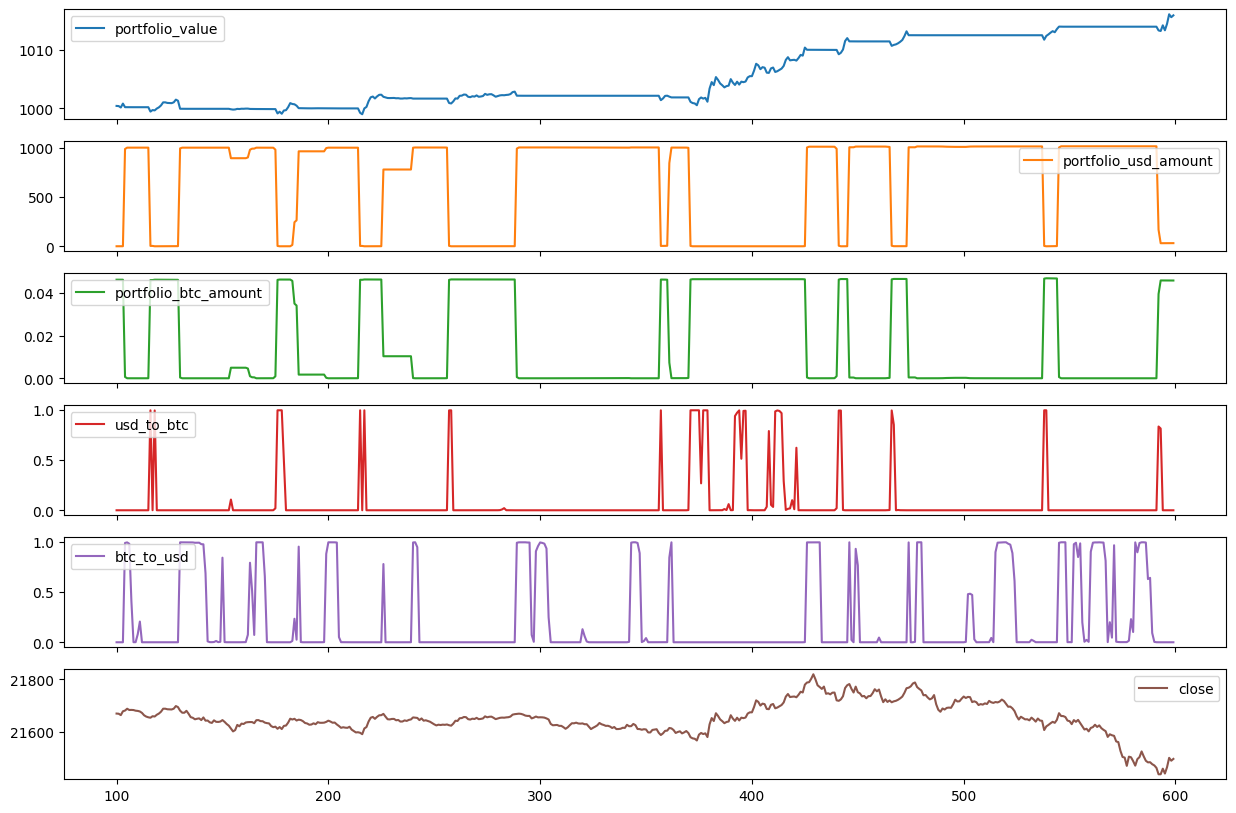

In [121]:
start = 100
delta = 500

tmp_df = actions[start:start+delta]
tmp_df.plot(
    y=['portfolio_value', 'portfolio_usd_amount', 'portfolio_btc_amount', 'usd_to_btc', 'btc_to_usd', 'close'],
    subplots=True,
    figsize=(15, 10)
)

In [122]:
portfolio['value'] = portfolio['usd_amount'] + portfolio['btc_amount'] * portfolio['close']

<AxesSubplot:>

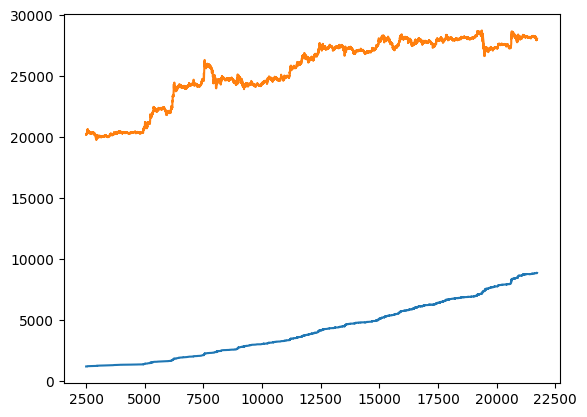

In [123]:
portfolio[2500:].value.plot()
portfolio[2500:].close.plot()

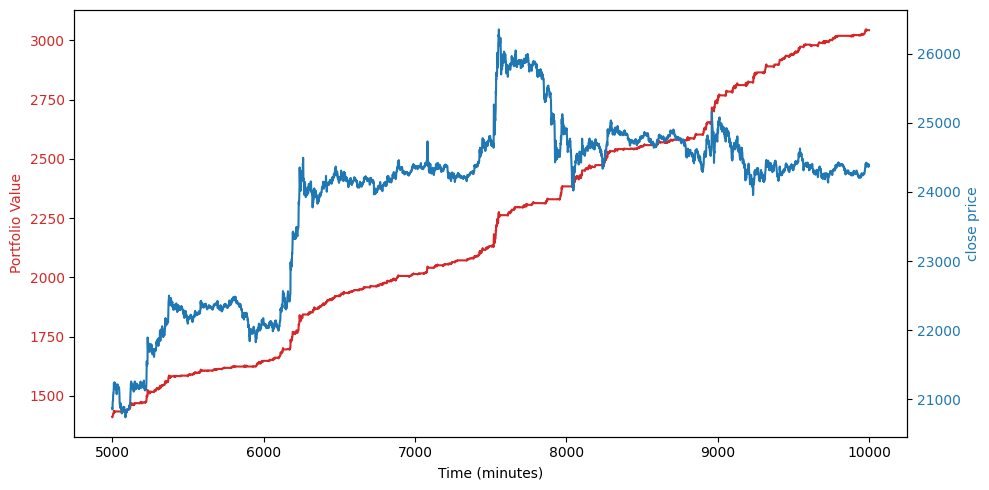

In [124]:
import matplotlib.pyplot as plt

df = portfolio[5000:10000]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Portfolio Value', color=color)
ax1.plot(df['value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('close price', color=color)
ax2.plot(df['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()


In [125]:
minutes_in_a_day = 24*60
number_of_days = int(len(portfolio) / minutes_in_a_day)
days = [minutes_in_a_day*day for day in range(number_of_days)]
daily_portfolio = portfolio['value'].loc[portfolio.index.isin(days)]

In [126]:
df = pd.DataFrame(daily_portfolio.values, columns=['portfolio_value'])

In [127]:
df['portfolio_returns'] = df['portfolio_value'].pct_change()

In [128]:
df

,portfolio_value,portfolio_returns
0,999.999998,NaN
1,1067.035707,0.067036
2,1243.312368,0.165202
3,1347.777256,0.084021
4,1617.987254,0.200486
5,2056.152897,0.270809
6,2569.618761,0.249722
7,3071.504592,0.195315
8,3590.665665,0.169025
9,4342.518515,0.209391


In [129]:
# Assuming df is your DataFrame
# Calculate daily returns
df['portfolio_returns'] = df['portfolio_value'].pct_change()

# Assume a risk-free rate (annualized)
risk_free_rate = 0.02 / 252  # Example: 2% annualized, divided by trading days

# Calculate mean of daily returns
mean_daily_returns = df['portfolio_returns'].mean()

# Calculate standard deviation of daily returns
std_dev_daily_returns = df['portfolio_returns'].std()

# Compute the daily Sharpe Ratio
sharpe_ratio = (mean_daily_returns - risk_free_rate) / std_dev_daily_returns

# Annualize the Sharpe Ratio
annual_sharpe_ratio = sharpe_ratio * (252 ** 0.5)  # Assuming 252 trading days in a year

print("Daily Sharpe Ratio:", sharpe_ratio)
print("Annualized Sharpe Ratio:", annual_sharpe_ratio)


Daily Sharpe Ratio: 2.628739896398085
Annualized Sharpe Ratio: 41.729952164058176
